In [1]:
%matplotlib inline
import sys
sys.path.append('/apps')
import django
django.setup()
from drivers.tree_builder import TreeNeo
from drivers.graph_models import TreeNode, Order, Family, graph

In [2]:
import redis

In [3]:
r = redis.StrictRedis(host="biospytial_redis")

In [4]:
r.keys()

['ncells2', 'bursera_n_cells']

In [11]:
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model

In [10]:
logscells = np.array(json.loads(r.get("bursera_n_cells")))

In [12]:
ncells = np.array(json.loads(r.get("ncells2")))

In [13]:
ncells

array([  2.53700000e+03,   2.23200000e+03,   1.55500000e+03,
         9.04000000e+02,   4.11000000e+02,   1.67000000e+02,
         6.00000000e+01,   2.40000000e+01,   9.00000000e+00,
         3.00000000e+00,   1.00000000e+00])

In [29]:
x = np.array(range(0,11))

In [30]:
regl = linear_model.LinearRegression()

In [22]:
x.reshape(1,-1)

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]])

In [23]:
x.reshape(-1,1)

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [33]:
model = regl.fit(X=x.reshape(-1,1),y=logscells.reshape(-1,1))

In [34]:
model.coef_

array([[-0.59202742]])

In [48]:
predx = np.linspace(0,10,100)

In [49]:
predx = predx.reshape(-1,1)

In [50]:
predy = model.predict(predx)

In [51]:
predy

array([[ 6.33147104],
       [ 6.27167029],
       [ 6.21186954],
       [ 6.15206879],
       [ 6.09226804],
       [ 6.03246729],
       [ 5.97266654],
       [ 5.91286579],
       [ 5.85306504],
       [ 5.79326429],
       [ 5.73346354],
       [ 5.67366279],
       [ 5.61386204],
       [ 5.55406129],
       [ 5.49426054],
       [ 5.43445979],
       [ 5.37465904],
       [ 5.31485829],
       [ 5.25505754],
       [ 5.19525679],
       [ 5.13545604],
       [ 5.07565529],
       [ 5.01585454],
       [ 4.95605379],
       [ 4.89625304],
       [ 4.83645229],
       [ 4.77665155],
       [ 4.7168508 ],
       [ 4.65705005],
       [ 4.5972493 ],
       [ 4.53744855],
       [ 4.4776478 ],
       [ 4.41784705],
       [ 4.3580463 ],
       [ 4.29824555],
       [ 4.2384448 ],
       [ 4.17864405],
       [ 4.1188433 ],
       [ 4.05904255],
       [ 3.9992418 ],
       [ 3.93944105],
       [ 3.8796403 ],
       [ 3.81983955],
       [ 3.7600388 ],
       [ 3.70023805],
       [ 3

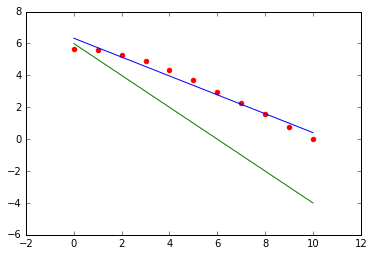

In [61]:
plt.plot(predx,predy)
plt.scatter(x,logscells,color='red')
plt.plot(predx,-predx + 6,color='green')

In [58]:
b,m = model.intercept_ , model.coef_


In [59]:
b

array([ 6.33147104])

In [60]:
m

array([[-0.59202742]])

In [63]:
# Bursera , species  by gender using the all counts method

In [65]:
import redis
r = redis.StrictRedis(host="biospytial_redis")
keys = r.keys()

In [66]:
keys

['Commiphora',
 'Icica',
 'Elaphrium',
 'Beiselia',
 'Bursera',
 'ncells2',
 'Terebinthus',
 'bursera_n_cells',
 'Protium']

In [67]:
import pandas as pd

In [68]:
tables = [ (key,pd.read_msgpack(r.get(key))) for key in r.keys()]

In [72]:
ncells = tables.pop(5)

In [76]:
burs_cells = tables.pop(6)

In [78]:
log4 = lambda x : np.log(x) / np.log(4)

In [98]:
logtables = map(lambda (name,table) : (name,table.applymap(log4)),tables)

In [86]:
len(logtables)

7

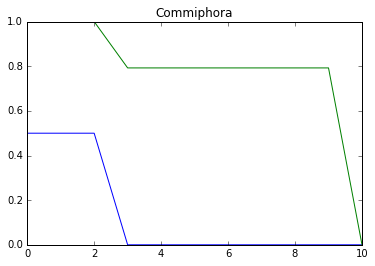

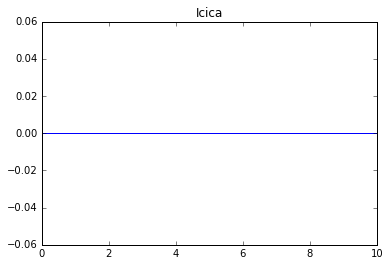

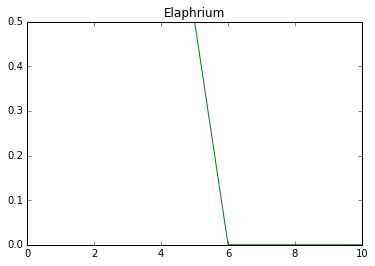

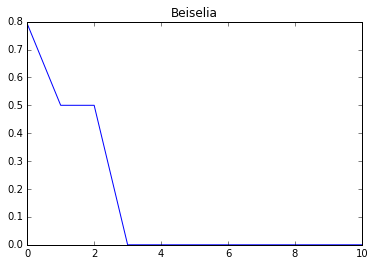

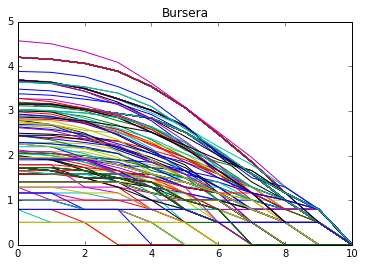

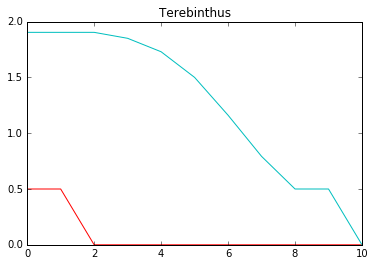

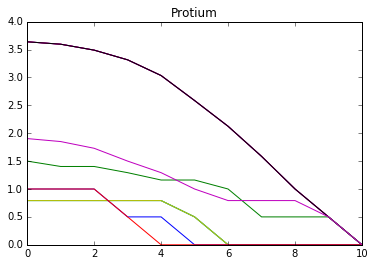

In [99]:
map(lambda (name,t) : t.plot(legend=False,title=name),logtables)

In [ ]:
tables

In [97]:
logtables[0]

,Commiphora tecomaca (DC.) Rzed. & R.Palacios-Chávez,Commiphora sarcopoda (Paul G.Wilson) Rzed. & R.Palacios-Chávez
0,0.5,1.000000
1,0.5,1.000000
2,0.5,1.000000
3,0.0,0.792481
4,0.0,0.792481
5,0.0,0.792481
6,0.0,0.792481
7,0.0,0.792481
8,0.0,0.792481
9,0.0,0.792481


In [102]:
tables[0]

('Commiphora',     Commiphora tecomaca (DC.) Rzed. & R.Palacios-Chávez  \
 0                                                 2.0     
 1                                                 2.0     
 2                                                 2.0     
 3                                                 1.0     
 4                                                 1.0     
 5                                                 1.0     
 6                                                 1.0     
 7                                                 1.0     
 8                                                 1.0     
 9                                                 1.0     
 10                                                1.0     
 
     Commiphora sarcopoda (Paul G.Wilson) Rzed. & R.Palacios-Chávez  
 0                                                 4.0               
 1                                                 4.0               
 2                                                 4.0

In [103]:
## Small exeample on how the assumption that you have a point for each cell on each scale

In [105]:
scales = np.linspace(1,10,100)

In [109]:
ncs = np.array(map(lambda x : 4**x,scales))

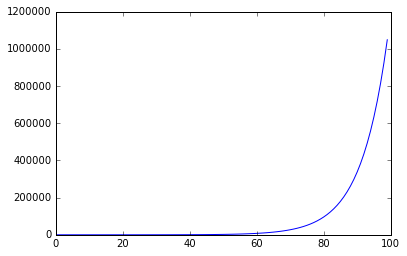

In [110]:
plt.plot(ncs)